In [1]:
DATOS_DIR = 'C:/Users/Peter/Desktop/all/Facu/Mineria De Datos Usando Sistemas Inteligentes/Datos/'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(DATOS_DIR + 'estudiantes.csv')
df.head()

,escuela,sexo,edad,ambito,grupo_familiar,estado_padres,educ_madre,educ_padre,trabajo_madre,trabajo_padre,...,rel_familia,tiempo_libre,sale_con_amigos,alcohol_diario,alcohol_semanal,salud,ausencias,nota_1er_parcial,nota_2do_parcial,nota_final
0,GP,F,18,urbano,mas de 3,separados,universitaria,universitaria,desde casa,educacion,...,buena,mas o menos,mucho,muy poco,muy poco,mas o menos,6,5,6,6
1,GP,F,17,urbano,mas de 3,NaN,primaria (hasta 4to),primaria (hasta 4to),desde casa,NaN,...,muy buena,mas o menos,mas o menos,muy poco,muy poco,mas o menos,4,5,5,6
2,GP,F,15,urbano,menos de 3,juntos,primaria (hasta 4to),primaria (hasta 4to),desde casa,otro,...,buena,mas o menos,poco,poco,mas o menos,mas o menos,10,7,8,10
3,GP,F,15,urbano,mas de 3,NaN,universitaria,primaria (hasta 9no),salud,servicios publicos,...,mas o menos,poco,poco,muy poco,muy poco,muy buena,2,15,14,15
4,GP,F,16,urbano,mas de 3,NaN,secundaria,secundaria,otro,NaN,...,buena,mas o menos,poco,muy poco,poco,muy buena,4,6,10,10


In [39]:
def matriz_correlacion(df):
    plt.figure(figsize=(10, 8))
    corr = df.select_dtypes(include=['int64', 'float64']).corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True)
    plt.title("Matriz de Correlación de Variables Numéricas", fontsize=16)
    plt.tight_layout()
    plt.show()

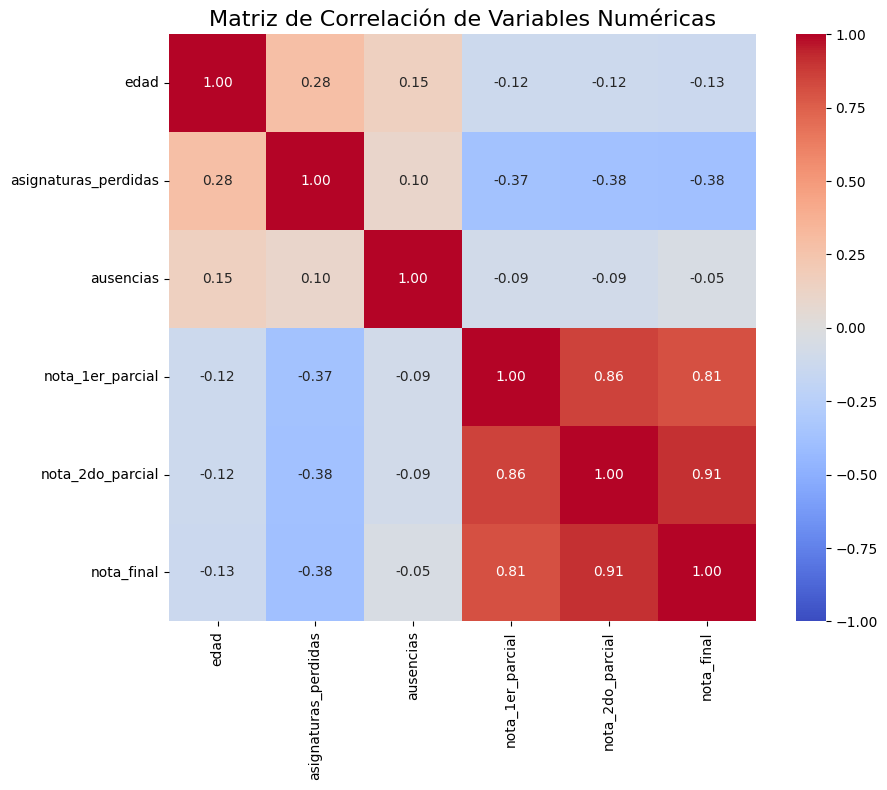

In [40]:
matriz_correlacion(df)

In [41]:
def grafico_notas(df):
    plt.figure(figsize=(15, 5))

    # Gráfico 1: Nota del 2do Parcial vs Nota Final
    plt.subplot(1, 3, 1)
    sns.scatterplot(data=df, x='nota_2do_parcial', y='nota_final')
    plt.title('2do Parcial vs Nota Final')
    plt.xlabel('Nota 2do Parcial')
    plt.ylabel('Nota Final')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Gráfico 2: Nota del 1er Parcial vs Nota Final
    plt.subplot(1, 3, 2)
    sns.scatterplot(data=df, x='nota_1er_parcial', y='nota_final')
    plt.title('1er Parcial vs Nota Final')
    plt.xlabel('Nota 1er Parcial')
    plt.ylabel('Nota Final')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Gráfico 3: Nota del 1er Parcial vs Nota 2do Parcial
    plt.subplot(1, 3, 3)
    sns.scatterplot(data=df, x='nota_1er_parcial', y='nota_2do_parcial')
    plt.title('1er Parcial vs 2do Parcial')
    plt.xlabel('Nota 1er Parcial')
    plt.ylabel('Nota 2do Parcial')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


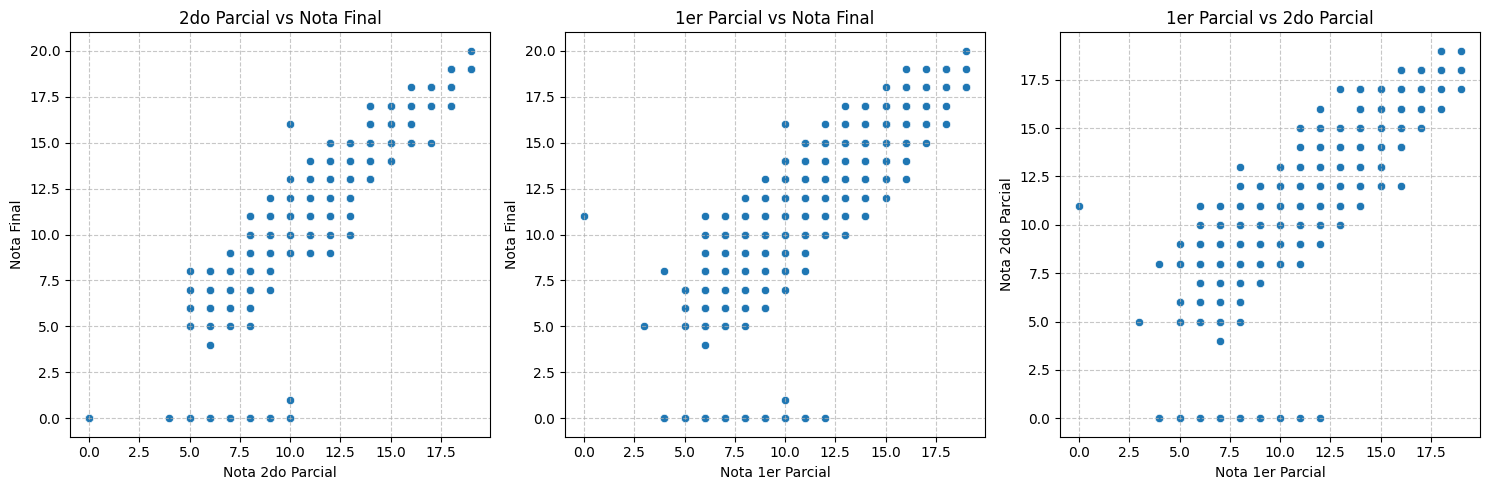

In [42]:
grafico_notas(df)

In [43]:
def grafico_ausencias_nota(df):
    plt.figure(figsize=(15, 6))

    # Histograma de ausencias
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='ausencias')
    plt.title('Distribución de Ausencias')
    plt.xlabel('Número de Ausencias')
    plt.ylabel('Frecuencia')

    # Histograma de nota final
    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='nota_final')
    plt.title('Distribución de Notas Finales')
    plt.xlabel('Nota Final')
    plt.ylabel('Frecuencia')

    # Boxplot de ausencias (horizontal)
    plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x='ausencias')
    plt.title('Boxplot de Ausencias')
    plt.xlabel('Número de Ausencias')

    # Boxplot de nota final (horizontal)
    plt.subplot(2, 2, 4)
    sns.boxplot(data=df, x='nota_final')
    plt.title('Boxplot de Notas Finales')
    plt.xlabel('Nota Final')

    plt.tight_layout()
    plt.show()


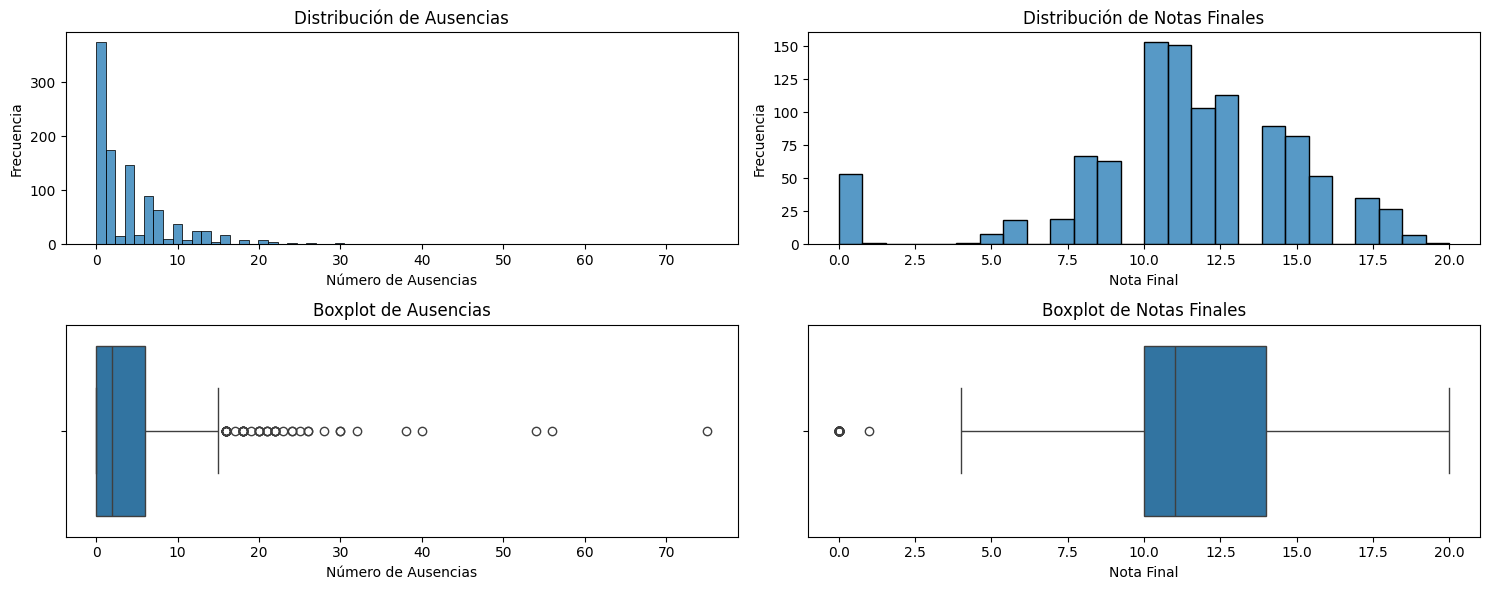

In [44]:
grafico_ausencias_nota(df)

In [45]:
def grafico_social_alcohol(df):
    plt.figure(figsize=(15, 5))

    # Diagrama de barras para salir con amigos
    plt.subplot(1, 3, 1)
    sns.countplot(data=df, x='sale_con_amigos')
    plt.title('Frecuencia de Salidas con Amigos')
    plt.xlabel('Sale con Amigos')
    plt.ylabel('Cantidad de Estudiantes')
    plt.xticks(rotation=45)

    # Diagrama de barras para consumo diario de alcohol
    plt.subplot(1, 3, 2)
    sns.countplot(data=df, x='alcohol_diario')
    plt.title('Consumo Diario de Alcohol')
    plt.xlabel('Nivel de Consumo')
    plt.ylabel('Cantidad de Estudiantes')
    plt.xticks(rotation=45)

    # Diagrama de barras para consumo semanal de alcohol
    plt.subplot(1, 3, 3)
    sns.countplot(data=df, x='alcohol_semanal')
    plt.title('Consumo Semanal de Alcohol')
    plt.xlabel('Nivel de Consumo')
    plt.ylabel('Cantidad de Estudiantes')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


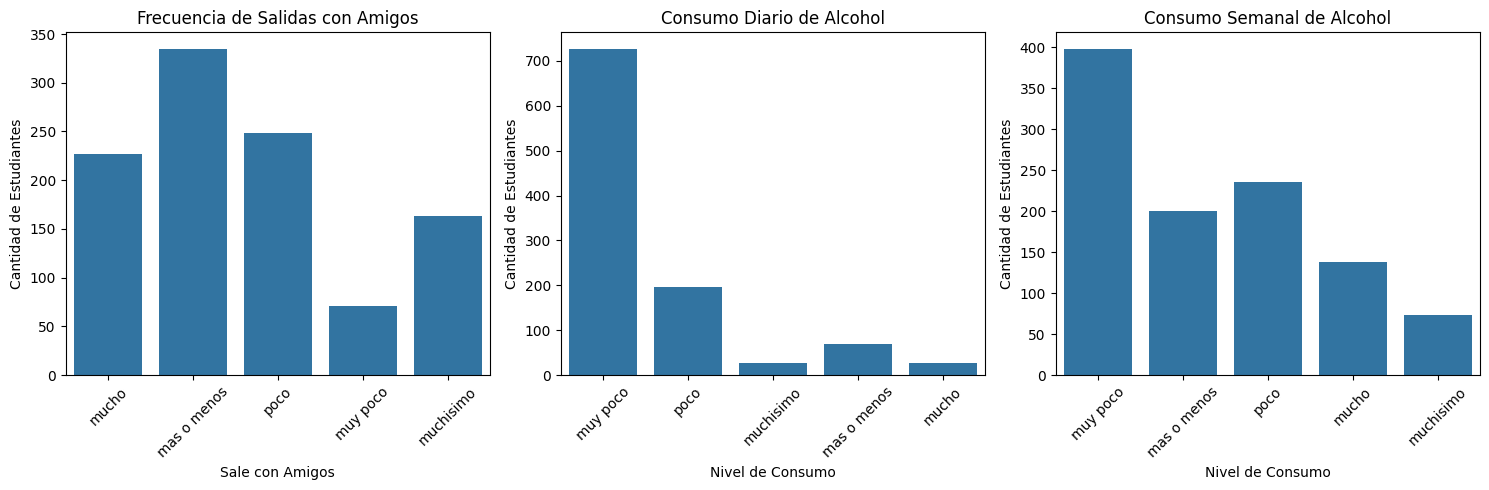

In [46]:
grafico_social_alcohol(df)

## B

In [47]:
def diagrama_de_barras(df, columna, titulo):
    """
    Genera un gráfico de barras de la columna especificada del DataFrame.
    
    Parámetros:
        df (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna a analizar.
    """
    barras = df[columna].value_counts()
    plt.figure()
    N = len(barras)
    plt.bar(np.arange(N), barras)  # Gráfico de barras
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title(f'{titulo}')
    # Colocamos las etiquetas del eje x
    plt.xticks(np.arange(N), barras.index)
    plt.show()

## Discretizo por rango

edad_rango
Baja     752
Media    278
Alta      14
Name: count, dtype: int64
Rangos de los intervalos: [14.993      17.33333333 19.66666667 22.        ]


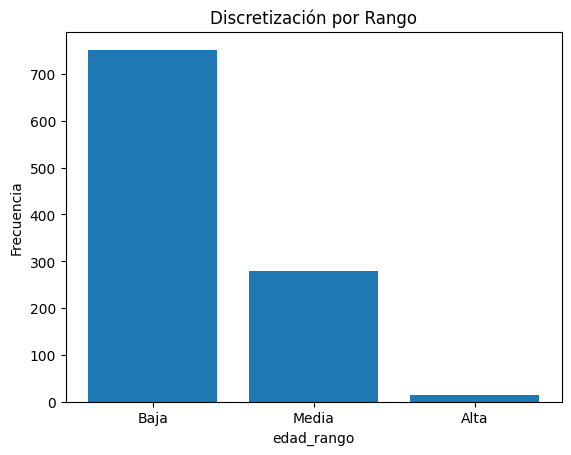

In [48]:
etiq = ["Baja","Media", "Alta"]

# Discretización por RANGO
df['edad_rango'], bins = pd.cut(df["edad"],bins=len(etiq),labels=etiq, retbins=True)

print(df['edad_rango'].value_counts())

print(f'Rangos de los intervalos: {bins}')

diagrama_de_barras(df,'edad_rango','Discretización por Rango')

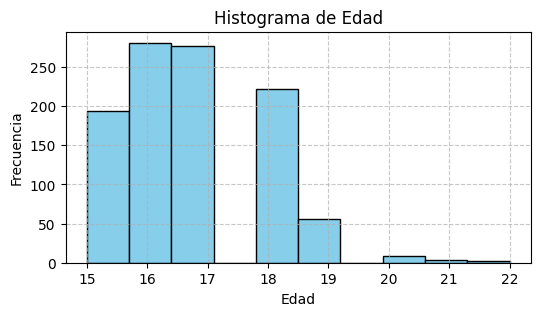

In [51]:
# Crear un histograma para la variable edad
plt.figure(figsize=(6, 3))
plt.hist(df['edad'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## Discretizo por frecuencia

edad_frecuencia
Baja     475
Alta     292
Media    277
Name: count, dtype: int64
Rangos de los intervalos: [15. 16. 17. 22.]


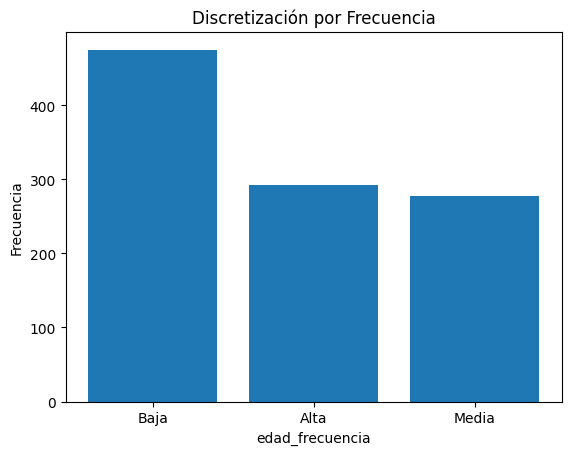

In [53]:
etiq = ["Baja", "Media", "Alta"]

df['edad_frecuencia'], bins = pd.qcut(df["edad"], q=len(etiq), labels=etiq, retbins=True)

print(df['edad_frecuencia'].value_counts())

print(f'Rangos de los intervalos: {bins}')

diagrama_de_barras(df,'edad_frecuencia','Discretización por Frecuencia')

## C - Genero atributo si es mayor

mayor_de_edad
NO    752
SI    292
Name: count, dtype: int64


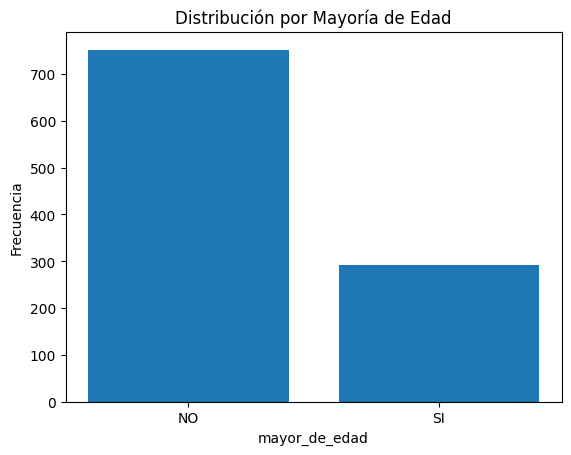

In [54]:
# Crear un nuevo atributo 'mayor_de_edad' basado en la edad
df['mayor_de_edad'] = df['edad'].apply(lambda x: 'SI' if x >= 18 else 'NO')

# Mostrar la distribución de mayores de edad
print(df['mayor_de_edad'].value_counts())

# Visualizar la distribución con un gráfico de barras
diagrama_de_barras(df, 'mayor_de_edad', 'Distribución por Mayoría de Edad')


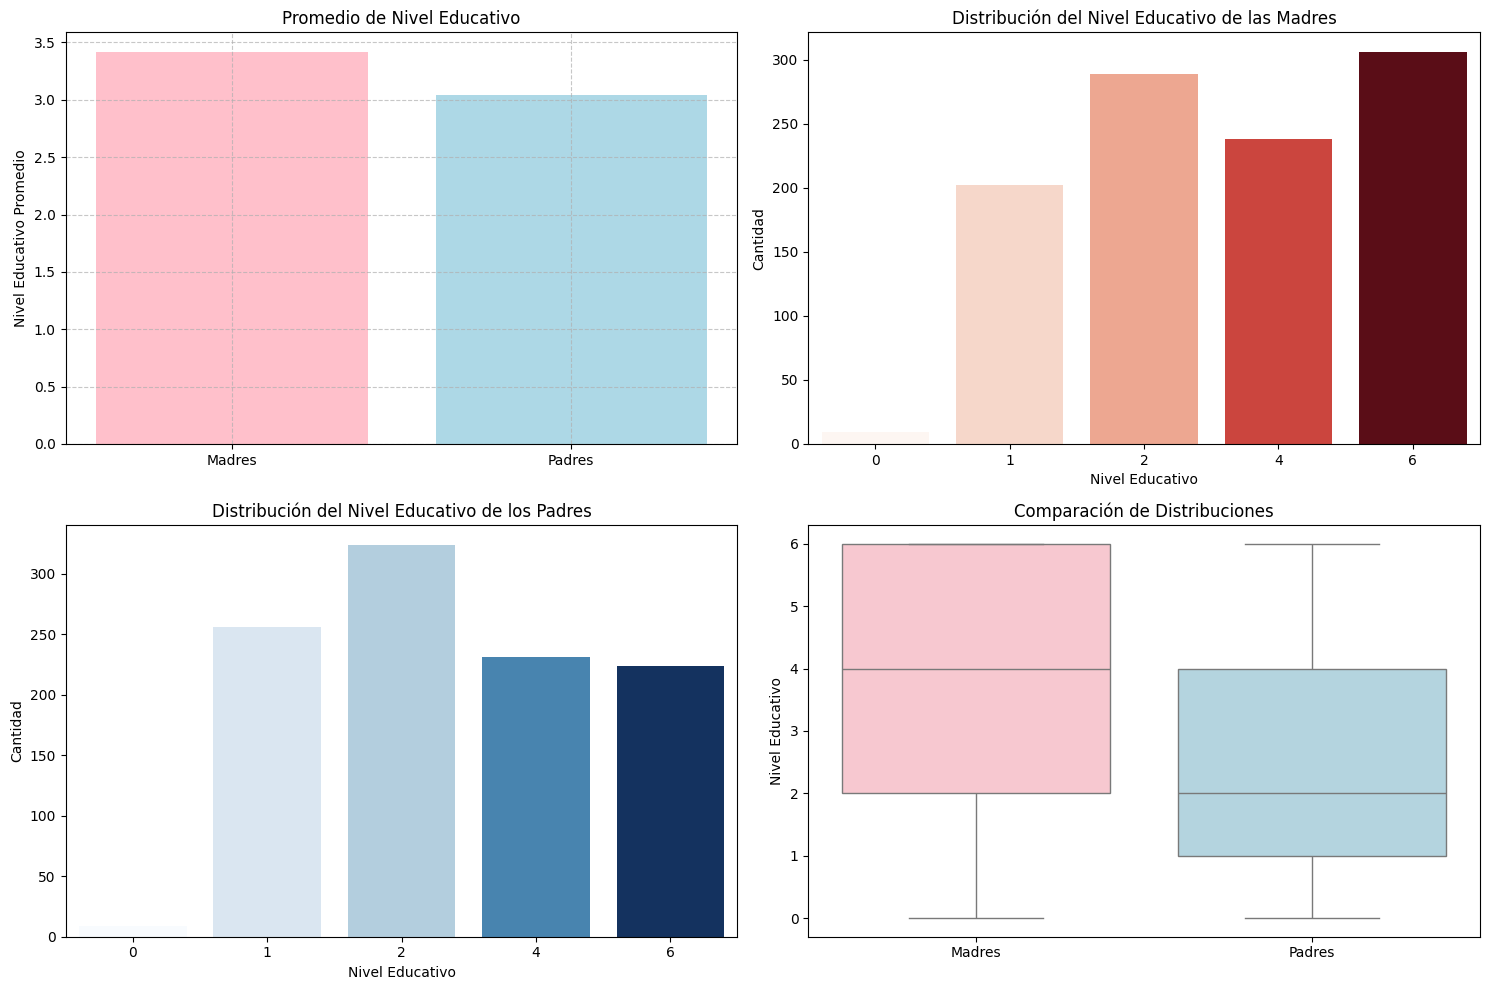


Estadísticas de niveles educativos:
Promedio nivel educativo madres: 3.42
Promedio nivel educativo padres: 3.04
Mediana nivel educativo madres: 4.0
Mediana nivel educativo padres: 2.0
Desviación estándar madres: 1.96
Desviación estándar padres: 1.88

Correlación entre nivel educativo de madres y padres: 0.64


In [70]:
# D. Mapear valores de educación a valores numéricos
mapeo_educacion = {
    'ninguna': 0,
    'primaria (hasta 4to)': 1,
    'primaria (hasta 9no)': 2,
    'secundaria': 4,
    'universitaria': 6
}

# Aplicar el mapeo a las columnas de educación
df['educ_madre_num'] = df['educ_madre'].map(mapeo_educacion)
df['educ_padre_num'] = df['educ_padre'].map(mapeo_educacion)

# Análisis comparativo del nivel educativo de madres y padres
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Comparación de promedios (barras)
promedios = [df['educ_madre_num'].mean(), df['educ_padre_num'].mean()]
axes[0, 0].bar(['Madres', 'Padres'], promedios, color=['pink', 'lightblue'])
axes[0, 0].set_title('Promedio de Nivel Educativo')
axes[0, 0].set_ylabel('Nivel Educativo Promedio')
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Gráfico 2: Distribución de niveles educativos (madres)
sns.countplot(x='educ_madre_num', data=df, ax=axes[0, 1], hue='educ_madre_num', legend=False, palette='Reds')
axes[0, 1].set_title('Distribución del Nivel Educativo de las Madres')
axes[0, 1].set_xlabel('Nivel Educativo')
axes[0, 1].set_ylabel('Cantidad')

# Gráfico 3: Distribución de niveles educativos (padres)
sns.countplot(x='educ_padre_num', data=df, ax=axes[1, 0], hue='educ_padre_num', legend=False, palette='Blues')
axes[1, 0].set_title('Distribución del Nivel Educativo de los Padres')
axes[1, 0].set_xlabel('Nivel Educativo')
axes[1, 0].set_ylabel('Cantidad')

# Gráfico 4: Comparación con boxplot
df_edu = pd.DataFrame({
    'Madres': df['educ_madre_num'],
    'Padres': df['educ_padre_num']
})
sns.boxplot(data=df_edu, ax=axes[1, 1], palette=['pink', 'lightblue'])
axes[1, 1].set_title('Comparación de Distribuciones')
axes[1, 1].set_ylabel('Nivel Educativo')

plt.tight_layout()
plt.show()

# Análisis estadístico de la comparación
print("\nEstadísticas de niveles educativos:")
print(f"Promedio nivel educativo madres: {df['educ_madre_num'].mean():.2f}")
print(f"Promedio nivel educativo padres: {df['educ_padre_num'].mean():.2f}")
print(f"Mediana nivel educativo madres: {df['educ_madre_num'].median()}")
print(f"Mediana nivel educativo padres: {df['educ_padre_num'].median()}")
print(f"Desviación estándar madres: {df['educ_madre_num'].std():.2f}")
print(f"Desviación estándar padres: {df['educ_padre_num'].std():.2f}")

# Correlación entre nivel educativo de padres y madres
corr = df['educ_madre_num'].corr(df['educ_padre_num'])
print(f"\nCorrelación entre nivel educativo de madres y padres: {corr:.2f}")


## E

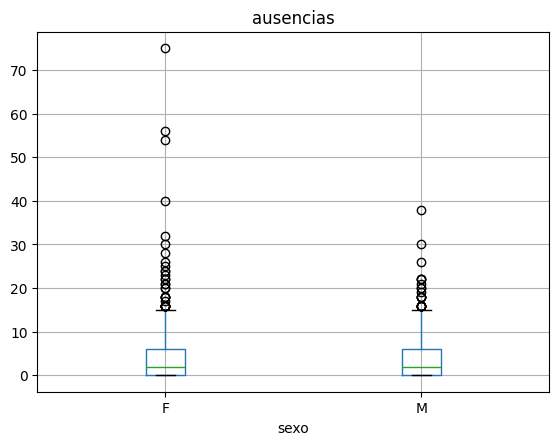

In [95]:
aux = df.boxplot(column=['ausencias'], by="sexo")
plt.suptitle("")
plt.show()

In [100]:
# Análisis detallado de ausencias por sexo
estadisticas_por_sexo = {}

for sexo in df['sexo'].unique():
    # Obtener datos de ausencias
    datos = df[df['sexo'] == sexo]['ausencias'].dropna()
    
    # Calcular estadísticas
    minimo = datos.min()
    maximo = datos.max()
    Q1 = datos.quantile(0.25)
    Q2 = datos.quantile(0.50)  # Mediana
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    
    # Límites para valores atípicos
    limite_inferior_leve = Q1 - 1.5 * IQR
    limite_superior_leve = Q3 + 1.5 * IQR
    limite_inferior_extremo = Q1 - 3 * IQR
    limite_superior_extremo = Q3 + 3 * IQR
    
    # Identificar valores atípicos
    atipicos_leves = datos[((datos < limite_inferior_leve) & (datos >= limite_inferior_extremo)) | 
                          ((datos > limite_superior_leve) & (datos <= limite_superior_extremo))].count()
    atipicos_extremos = datos[(datos < limite_inferior_extremo) | (datos > limite_superior_extremo)].count()
    
    # Guardar estadísticas
    estadisticas_por_sexo[sexo] = {
        'Máximo': maximo,
        '3er.cuartil': Q3,
        '2do. cuartil': Q2,
        '1er. cuartil': Q1,
        'Mínimo': minimo,
        'Rango Intercuartil': IQR,
        'Atípicos leves': atipicos_leves,
        'Atípicos extremos': atipicos_extremos
    }

tabla_estadisticas = pd.DataFrame(estadisticas_por_sexo)
display(tabla_estadisticas)


,F,M
Máximo,75.0,38.0
3er.cuartil,6.0,6.0
2do. cuartil,2.0,2.0
1er. cuartil,0.0,0.0
Mínimo,0.0,0.0
Rango Intercuartil,6.0,6.0
Atípicos leves,23.0,19.0
Atípicos extremos,9.0,3.0


- Es atípico que un estudiante tenga más de 20 ausencias. **V**
- Los cuartiles del atributo AUSENCIAS son los mismos para ambos sexos por lo que puede afirmarse que la cantidad de mujeres y varones con más de 6 ausencias coinciden. **los cuartiles son los mismos, pero la cantidad no puede afirmarse**
- Al menos el 25% de las mujeres tiene asistencia perfecta. **Si, ya que el primer quartil es 0**
- Es atípico encontrar un varón que no haya faltado nunca. **Falso por lo dicho antes** 
- La cantidad de mujeres con valores atípicos leves en el atributo AUSENCIAS es mayor que la de varones.  **V**